#Predicting The Costs Of Used Cars With fast.ai



##Importing All Major Libraries

In [0]:
import pandas as pd
import numpy as np
from fastai.tabular import *

**The fastai.tabular package includes all the modules that are necessary for processing tabular data.**

## Importing The Data

In [0]:
#Reading the datasets from excel sheet
training_set = pd.read_excel("Data_Train.xlsx")
test_set = pd.read_excel("Data_Test.xlsx")


## Understanding The Data

In [0]:
training_set.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [0]:

# Checking the number of rows
print("\n\nNumber of observations in the datasets :\n",'#' * 40)

print("\nTraining Set : ",len(training_set))
print("Test Set : ",len(test_set))

# checking the number of features in the Datasets
print("\n\nNumber of features in the datasets :\n",'#' * 40)

print("\nTraining Set : ",len(training_set.columns))
print("Test Set : ",len(test_set.columns))

# checking the features in the Datasets
print("\n\nFeatures in the datasets :\n",'#' * 40)

print("\nTraining Set : ", list(training_set.columns))
print("Test Set : ",list(test_set.columns))

# Checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)

print("\nTraining Set : ", training_set.dtypes)
print("\nTest Set : ",test_set.dtypes)

# checking for NaNs or empty cells
print("\n\nEmpty cells or Nans in the datasets :\n",'#' * 40)

print("\nTraining Set : ",training_set.isnull().values.any())
print("\nTest Set : ",test_set.isnull().values.any())

# checking for NaNs or empty cells by column
print("\n\nNumber of empty cells or Nans in the datasets :\n",'#' * 40)

print("\nTraining Set : ","\n", training_set.isnull().sum())
print("\nTest Set : ",test_set.isnull().sum())

#Displaying dataset information
print("\n\nInfo:\n",'#' * 40)

training_set.info()




Number of observations in the datasets :
 ########################################

Training Set :  6019
Test Set :  1234


Number of features in the datasets :
 ########################################

Training Set :  13
Test Set :  12


Features in the datasets :
 ########################################

Training Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
Test Set :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']


Datatypes of features in the datasets :
 ########################################

Training Set :  Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object

### Exploring Categorical features


In [0]:
# Non categorical Features in The dataset
training_set.select_dtypes(['int','float']).columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [0]:
#Categotical Features in The Dataset
training_set.select_dtypes('object').columns


Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [0]:
#The Unique values in each of the categorical features 

all_brands = list(training_set.Name) + list(test_set.Name)

all_locations = list(training_set.Location) + list(test_set.Location)

all_fuel_types = list(training_set.Fuel_Type) + list(test_set.Fuel_Type)

all_transmissions = list(training_set.Transmission) + list(test_set.Transmission)

all_owner_types = list(training_set.Owner_Type) + list(test_set.Owner_Type)



print("\nNumber Of Unique Values In Name : \n ", len(set(all_brands)))
#print("\nThe Unique Values In Name : \n ", set(all_brands))

print("\nNumber Of Unique Values In Location : \n ", len(set(all_locations)))
print("\nThe Unique Values In Location : \n ", set(all_locations) )

print("\nNumber Of Unique Values In Fuel_Type : \n ", len(set(all_fuel_types)))
print("\nThe Unique Values In Fuel_Type : \n ", set(all_fuel_types) )

print("\nNumber Of Unique Values In Transmission : \n ", len(set(all_transmissions)))
print("\nThe Unique Values In Transmission : \n ", set(all_transmissions) )

print("\nNumber Of Unique Values In Owner_Type : \n ", len(set(all_owner_types)))
print("\nThe Unique Values In Owner_Type : \n ", set(all_owner_types) )


Number Of Unique Values In Name : 
  2041

Number Of Unique Values In Location : 
  11

The Unique Values In Location : 
  {'Hyderabad', 'Kolkata', 'Coimbatore', 'Delhi', 'Bangalore', 'Pune', 'Mumbai', 'Chennai', 'Jaipur', 'Kochi', 'Ahmedabad'}

Number Of Unique Values In Fuel_Type : 
  5

The Unique Values In Fuel_Type : 
  {'Electric', 'CNG', 'LPG', 'Petrol', 'Diesel'}

Number Of Unique Values In Transmission : 
  2

The Unique Values In Transmission : 
  {'Automatic', 'Manual'}

Number Of Unique Values In Owner_Type : 
  4

The Unique Values In Owner_Type : 
  {'First', 'Fourth & Above', 'Second', 'Third'}


## Feature Generation And Dataset Restructuring

In [0]:
#Based on the information gathered from the data, lets simplify and restructure it.

def restructure(data):
  
  names = list(data.Name)
  
  brand = []
  model = []
  
  #Splitting The Column 'Name'
  for i in range(len(names)):
    try:
      brand.append(names[i].split(" ")[0])
      try:
        model.append(" ".join(names[i].split(" ")[1:]).strip())
      except:
        pass
    except:
        print("ERR ! - ", names[i], "@" , i)
        
  
  #Cleaning Mileage Column
  mileage = list(data.Mileage)
  
  for i in range(len(mileage)):
    try :
      mileage[i] = float(mileage[i].split(" ")[0].strip())
    except:
      mileage[i] = np.nan
      
  #Cleaning Engine Column   
  engine = list(data.Engine)
  for i in range(len(engine)):
    try :
      engine[i] = int(engine[i].split(" ")[0].strip())
    except:
      engine[i] = np.nan
      
  #Cleaning Power Columns
  power = list(data.Power)
  for i in range(len(power)):
    try :
      power[i] = float(power[i].split(" ")[0].strip())
    except:
      power[i] = np.nan
      
  #Cleaning New_Price
  data['New_Price'].fillna(0, inplace = True)
  
  newp = list(data['New_Price'])
  
  for i in range(len(newp)):
    if newp[i] == 0:
      newp[i] = float(newp[i])
      continue
    elif 'Cr' in newp[i]:
      newp[i] = float(newp[i].split()[0].strip()) * 100 
    elif 'Lakh' in newp[i]:
      newp[i] = float(newp[i].split()[0].strip())
      
      
  #Re-ordering the columns

  restructured = pd.DataFrame({'Brand': brand,
                              'Model':model,
                              'Location': data['Location'], 
                              'Year':data['Year'] , 
                              'Kilometers_Driven':data['Kilometers_Driven'],
                              'Fuel_Type':data['Fuel_Type'],
                              'Transmission':data['Transmission'],
                              'Owner_Type':data['Owner_Type'],
                              'Mileage':mileage,
                              'Engine':engine,
                              'Power':power,
                              'Seats':data['Seats'],
                              'New_Price':newp
                             })

  #If the dataset passed is training set include the Price column
  if 'Price' in data.columns:
    restructured['Price'] = data['Price']
    return restructured
  
  
  else:
    return restructured
  

**Summary:**

The data is is restructured in the following ways:
1. The Name column in the original dataset is split in to two features, Brand and Model.
1. The Mileage column is cleaned to have float values.
1. The Engine column is cleaned to have integer values.
2. The Power column is cleaned to have integer values.
2. The New_Price column is cleaned to remove nulls and correct the units.





In [0]:
#Restructuring Training and Test sets
train_data = restructure(training_set)
test_data = restructure(test_set)

In [0]:
#the dimensions of the training set
train_data.shape

(6019, 14)

In [0]:
#the dimensions of the test set
test_data.shape

(1234, 13)

In [0]:
#Top 5 rows of the training set
train_data.head(5)

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.00,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,0.00,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,0.00,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,0.00,17.74


In [0]:
#Top 5 rows of the test set
test_data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,0.00
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,0.00
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,25.27
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,0.00
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,0.00


## Regression With Fast.ai


###Creating A TabularList

TabularList in fastai is the basic ItemList for any kind of tabular data.It is a class to create a list of inputs in items for tabular data. 

Main Arguments:

cat_names : The categorical features in the data.

cont_names : The continuous features in the data.

procs : A liat of transformations to be applies to the data such as FillMissing, Categorify, Normalize etc.

In [0]:
#Defining the keyword arguments for fastai's TabularList

#Path / default location for saving/loading models
path = ''

#The dependent variable/target
dep_var = 'Price'

#The list of categorical features in the dataset
cat_names = ['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'Price'
cont_names =['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price'] 

#List of Processes/transforms to be applied to the dataset
procs = [FillMissing, Categorify, Normalize]


In [0]:
#Start index for creating a validation set from train_data
start_indx = len(train_data) - int(len(train_data) * 0.2)

#End index for creating a validation set from train_data
end_indx = len(train_data)


#TabularList for Validation
val = (TabularList.from_df(train_data.iloc[start_indx:end_indx].copy(), path=path, cat_names=cat_names, cont_names=cont_names))

test = (TabularList.from_df(test_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs))



In [0]:
#TabularList for training
data = (TabularList.from_df(train_data, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

**Summary:**

1. Initializing/Setting The parameters for TabularList such as path, dep_var, cat_names, cont_names and procs.
1. Setting the index for Validation set. The start index and End index are set in such a away that it takes the last 20% data from the training set for validation.
2. Creating TabularList for Validation set from train_data. 
2. Creating TabularList for Test set from test_data. 
1. Creating a DataBunch for the network.DataBunch is a class that binds train_dl,valid_dl and test_dl in a data object.





In [0]:
#Display the data batch
data.show_batch(rows = 10)

Brand,Model,Location,Fuel_Type,Transmission,Owner_Type,Mileage_na,Engine_na,Power_na,Seats_na,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,target
Nissan,Micra Active XV,Pune,Petrol,Manual,First,False,False,False,False,1.4350,-0.3498,0.3534,-0.7136,-0.8759,-0.3457,0.2942,4.0
Maruti,Zen Estilo 1.1 LXI BSIII,Bangalore,Petrol,Manual,Second,False,False,False,False,-1.9544,0.0080,0.0264,-0.9445,-0.9338,-0.3457,-0.2485,1.65
Maruti,Swift LDI SP Limited Edition,Hyderabad,Diesel,Manual,First,False,False,False,False,0.8188,-0.0453,1.5627,-0.6294,-0.7433,-0.3457,-0.2485,6.25
Renault,Duster 110PS Diesel RxZ,Delhi,Diesel,Manual,First,False,False,False,False,-0.1056,0.0776,0.2042,-0.2704,-0.0868,-0.3457,-0.2485,4.75
Maruti,SX4 ZDI,Chennai,Diesel,Manual,Third,False,False,False,False,-0.7219,0.2068,0.7507,-0.6294,-0.4612,-0.3457,-0.2485,3.5
Maruti,Zen Estilo LXI BS IV,Mumbai,Petrol,Manual,First,False,False,False,False,-1.3381,-0.1212,0.2020,-1.0507,-0.8747,-0.3457,-0.2485,1.46
Hyundai,i10 Sportz 1.2,Bangalore,Petrol,Manual,First,False,False,False,False,-1.0300,-0.3001,0.5004,-0.7153,-0.6499,-0.3457,-0.2485,3.45
Honda,City i-VTEC V,Kolkata,Petrol,Manual,First,False,False,False,False,-0.7219,-0.2646,-0.1492,-0.2097,0.0818,-0.3457,0.6630,3.87
Mahindra,XUV500 W6 2WD,Coimbatore,Diesel,Manual,First,False,False,False,False,0.8188,0.0373,-0.6540,0.9396,0.5144,2.1244,-0.2485,11.05
Toyota,Innova 2.5 G (Diesel) 7 Seater BS IV,Hyderabad,Diesel,Manual,First,False,False,False,False,-0.4138,0.7137,-1.1171,1.4705,-0.2478,2.1244,-0.2485,9.6


###Initializing Neural Network



In [0]:
#Initializing the network
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics= [rmse,r2_score])



The above line of code will initialize a neural network with 4 layers and the number of nodes in each layer as 300,200, 100 and 50 respectively. 

The network will use two primary metrics for evaluation:

* Root Mean Squared Error(RMSE)
* R-Squared



In [0]:
#Show the complete Summary of the model
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (4816 items)
x: TabularList
Brand Maruti; Model Wagon R LXI CNG; Location Mumbai; Fuel_Type CNG; Transmission Manual; Owner_Type First; Mileage_na False; Engine_na False; Power_na False; Seats_na False; Year -1.0300; Kilometers_Driven 0.1273; Mileage 1.8700; Engine -1.0507; Power -1.0451; Seats -0.3457; New_Price -0.2485; ,Brand Hyundai; Model Creta 1.6 CRDi SX Option; Location Pune; Fuel_Type Diesel; Transmission Manual; Owner_Type First; Mileage_na False; Engine_na False; Power_na False; Seats_na False; Year 0.5106; Kilometers_Driven -0.1808; Mileage 0.3490; Engine -0.0665; Power 0.2514; Seats -0.3457; New_Price -0.2485; ,Brand Honda; Model Jazz V; Location Chennai; Fuel_Type Petrol; Transmission Manual; Owner_Type First; Mileage_na False; Engine_na False; Power_na False; Seats_na False; Year -0.7219; Kilometers_Driven -0.1311; Mileage 0.0264; Engine -0.7119; Power -0.4631; Seats -0.3457; New_Price 0.4200

###Training The Network

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


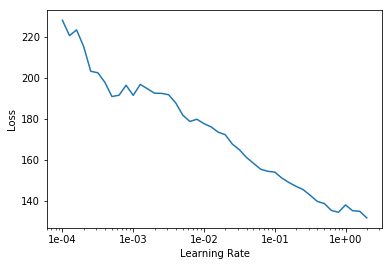

In [0]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

Learning rate is a hyper-parameter that controls how much the weights of the network is being adjusted with respect the loss gradient.

The lr_find method helps explore the learning rate in a specified range. The graph shows the deviation in loss with respect to the learning rate.

In [0]:
#Fitting data and training the network
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,170.930954,161.123108,12.526302,-0.330882,00:01
1,152.859070,149.356277,12.099945,-0.264155,00:01
2,119.679787,96.389923,9.771078,0.140050,00:01
3,82.348785,55.138988,7.370564,0.508471,00:01
4,48.968166,23.842108,4.833325,0.789911,00:01
5,26.032892,17.158106,3.929134,0.869249,00:01
6,17.878710,9.110335,2.786590,0.926840,00:01
7,13.887877,9.249630,2.722911,0.934174,00:01
8,13.685216,14.990489,3.492407,0.894274,00:01
9,11.866707,9.405542,2.823769,0.926297,00:01


**The above line trains the network for 25 epochs.**

### Evaluating Performance

In [0]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train,rows = 5)

Brand,Model,Location,Fuel_Type,Transmission,Owner_Type,Mileage_na,Engine_na,Power_na,Seats_na,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,target,prediction
Volkswagen,Polo Petrol Comfortline 1.2L,Kochi,Petrol,Manual,First,False,False,False,False,-0.4138,-0.0634,-0.3533,-0.7136,-0.7452,-0.3457,-0.2485,3.82,[4.371329]
Toyota,Corolla Altis G MT,Kolkata,Petrol,Manual,First,False,False,False,False,0.2025,-0.3199,-0.8340,0.2975,0.4769,-0.3457,-0.2485,7.95,[8.259411]
Maruti,Wagon R VXI,Mumbai,Petrol,Manual,First,False,False,False,False,0.2025,-0.1547,0.9701,-1.0507,-0.8759,-0.3457,0.1871,3.16,[3.749952]
Hyundai,Accent CRDi,Kochi,Diesel,Manual,First,False,False,False,False,-2.2625,1.0072,-1.0930,-0.2165,-0.5908,-0.3457,-0.2485,1.8,[2.474023]
Honda,Amaze S i-Dtech,Ahmedabad,Diesel,Manual,First,False,False,False,False,0.2025,0.0209,1.6944,-0.2080,-0.2745,-0.3457,-0.2485,4.35,[5.159999]


In [0]:
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid)

Brand,Model,Location,Fuel_Type,Transmission,Owner_Type,Mileage_na,Engine_na,Power_na,Seats_na,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,target,prediction
BMW,#na#,Delhi,Petrol,Automatic,Second,False,False,False,False,-2.2625,-0.1112,-1.4178,2.2879,3.6776,-0.3457,-0.2485,6.99,[10.922736]
Hyundai,Elantra CRDi SX,Coimbatore,Diesel,Manual,First,False,False,False,False,1.7431,-0.1722,1.0140,-0.0665,0.2514,-0.3457,-0.2485,15.57,[9.735545]
Tata,Sumo EX,Coimbatore,Diesel,Manual,First,False,False,False,False,0.5106,0.2558,-0.6101,2.2491,-0.5565,2.1244,-0.2485,5.29,[5.969137]
Datsun,#na#,Kolkata,Petrol,Manual,First,False,False,False,False,0.8188,-0.4392,1.0140,-1.3861,-1.1312,-0.3457,0.0605,2.25,[2.973508]
BMW,X5 xDrive 30d,Chennai,Diesel,Automatic,First,False,False,False,False,-1.3381,0.5049,-1.4002,2.3115,2.5152,-0.3457,-0.2485,20.0,[17.299963]


In [0]:
#Getting The Training And Validation Errors

tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)
print("The Metrics used In Evaluating The Network:", str(learn.metrics))

print("\nThe calculated RMSE & R-Squared For The Training Set :", tr[1:])
print("\nThe calculated RMSE & R-Squared For The Validation Set :", va[1:])

The Metrics used In Evaluating The Network: [<function root_mean_squared_error at 0x7fe2cd330268>, <function r2_score at 0x7fe2cd330400>]

The calculated RMSE & R-Squared For The Training Set : [tensor(1.6506), tensor(0.9713)]

The calculated RMSE & R-Squared For The Validation Set : [tensor(3.0779), tensor(0.9166)]


Summary:

The Root Mean Squared Error is the standard deviation of the errors/residuals. It tells us the 'Goodness Of Fit' of a model. The lower the value of RMSE the better the model.

The R-Squared metric also called the coefficient of determination is used to understand the variation in the dependent variable(y) and the independent variable(X).The closer the value of R-Squared is to one, the better the model.

**The above output suggests that:**

**The model/network was able to attain an RMSE of 1.4678 and an R_squared of 0.9726 while training and an RMSE of 3.1737 and an R_squared of 0.9107 while Validating on the validation set.**




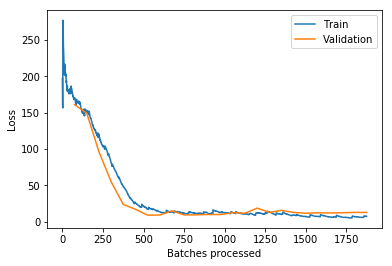

In [0]:
#Plotting The losses for training and validation
learn.recorder.plot_losses()


The above graph shows the change is loss during the course of training the network. At the beginning of the training we can see a high loss value. As the networks learned from the data, the loss started to drop until it could no longer improve during the course of training.

The validation shows a relatively consistent and low loss values. 


**Note :**

The validation losses are only calculated once per epoch, whereas training losses are calculated after 


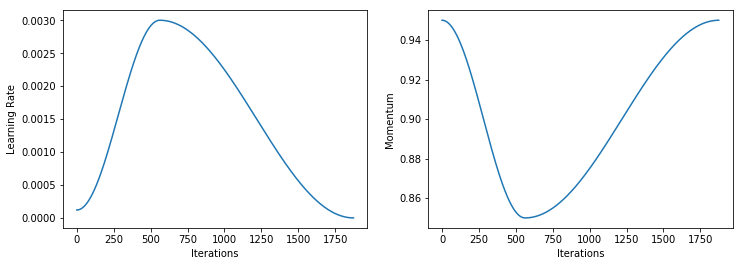

In [0]:
#Plotting Momentum & Learning Rate
learn.recorder.plot_lr(show_moms=True)


The above plots learning rate and momentum during the course of training.



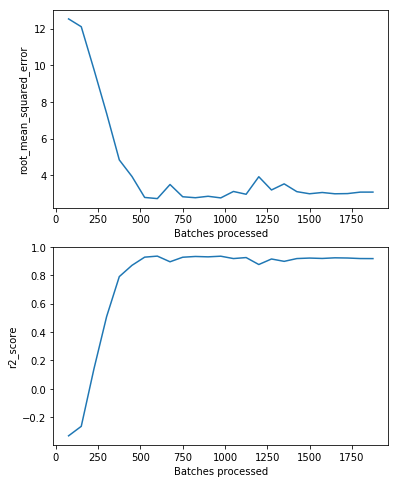

In [0]:
#Plotting the metrics of evaluation
learn.recorder.plot_metrics()


The decreasing RMSE and increasing R-Squared depicts the Goodness Of Fit.


### Exploring Validation Predictions

In [0]:
val = train_data.tail(1203)

In [0]:
#Converting the prediction to DataFrame for Comparing
val_preds = learn.get_preds(ds_type=DatasetType.Valid)[0]
val_preds = [i[0] for i in val_preds.tolist()] 
val['Predicted'] = val_preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
val.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Predicted
4816,BMW,5 Series 2003-2012 540i Sedan,Delhi,2006,48000,Petrol,Automatic,Second,11.62,2979.0,306.00,5.0,0.00,6.99,10.922736
4817,Hyundai,Elantra CRDi SX,Coimbatore,2019,41871,Diesel,Manual,First,22.70,1582.0,126.20,5.0,0.00,15.57,9.735545
4818,Tata,Sumo EX,Coimbatore,2015,84931,Diesel,Manual,First,15.30,2956.0,83.80,7.0,0.00,5.29,5.969137
4819,Datsun,redi-GO T,Kolkata,2016,15000,Petrol,Manual,First,22.70,799.0,53.64,5.0,3.98,2.25,2.973508
4820,BMW,X5 xDrive 30d,Chennai,2009,110000,Diesel,Automatic,First,11.70,2993.0,245.00,5.0,0.00,20.00,17.299963


#### Calculating RMLSE For Validation Predictions

Since the metric used in the hackathon for evaluating the predictions is RMSLE , we will calculate te same for the validation predictions to evaluate our model.

In [0]:
import numpy as np
Y_true = val['Price']
pred = val['Predicted']


#RMSLE
error = np.square(np.log10(pred + 1) - np.log10(Y_true +1)).mean() ** 0.5

score = 1 - error
print("SCORE For Validation : ",score)


SCORE For Validation :  0.9172702494251687


#### A Simple Analysis On Predictions

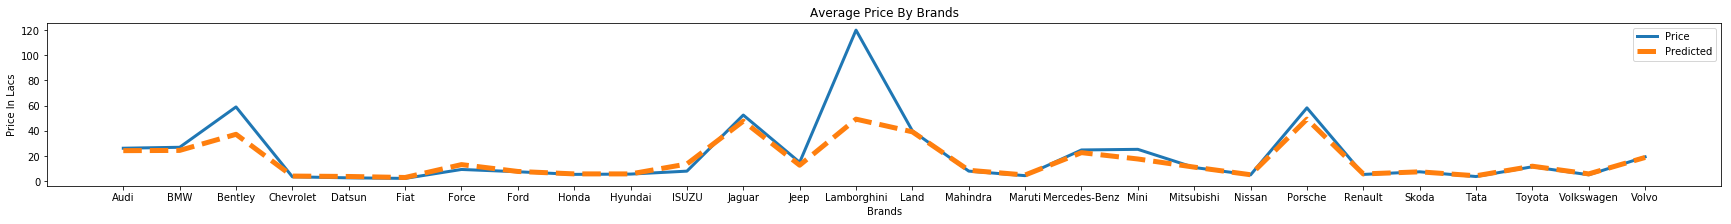

In [0]:
#Plotting The Average Price For A Given Car Brand, -- Actual vs Predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 3))
plt.plot(val.groupby(['Brand']).mean()['Price'], linewidth = 3, )

plt.plot(val.groupby(['Brand']).mean()['Predicted'],linewidth = 5, ls  = '--')
plt.title('Average Price By Brands')
plt.xlabel('Brands')
plt.ylabel('Price In Lacs')
plt.legend()
plt.show()

The above graph shows comparison of the the average actual price by Brand and the predicted price.

In [0]:
print("R-Squared For Validation Set : ", r2_score(learn.get_preds(ds_type=DatasetType.Valid)[0], learn.get_preds(ds_type=DatasetType.Valid)[1]))

R-Squared For Validation Set :  tensor(0.9025)


In [0]:
print("\nRMSE For Validation Set : ",root_mean_squared_error(learn.get_preds(ds_type=DatasetType.Valid)[0], learn.get_preds(ds_type=DatasetType.Valid)[1]))


RMSE For Validation Set :  tensor(3.5719)


###Predicting For Test Data

####Predicting For A Single Row OF Test Set

In [0]:
#Test set data for row 0
test_data.iloc[0]

Brand                          Maruti
Model                Alto K10 LXI CNG
Location                        Delhi
Year                             2014
Kilometers_Driven               40929
Fuel_Type                         CNG
Transmission                   Manual
Owner_Type                      First
Mileage                         32.26
Engine                            998
Power                            58.2
Seats                               4
New_Price                           0
Name: 0, dtype: object

In [0]:
#Prediction in float for Test set data for row 0
float(learn.predict(test_data.iloc[0])[1])

3.432666063308716

####Predicting For Test Set

In [0]:
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]

In [0]:
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]

In [0]:
#Converting the prediction to . a dataframe
test_predictions = pd.DataFrame(test_predictions, columns = ['Price'])

In [0]:
#Writing the predictions to an excel file.
predictions.to_excel("Fast_ai_solution.xlsx", index = False)

**Submit the above file [here](https://www.machinehack.com/course/predicting-the-costs-of-used-cars-hackathon-by-imarticus/leaderboard) to find out your score. Good Luck!**
